# **Optimistic Greedy vs Realistic ε-Greedy**

Greedy: zawsze wybieramy akcję maksymalizującą nagrodę <br>
ε-Greedy: z dużym prawdopodobieństwem (1-ε) wybieramy akcję maksymalizującą nagrodę, a z małym prawdopodobieństwem ε wybieramy losową akcję

Optimistic: Q_1 = 5, zachęcamy agenta do eksploracji <br>
Realistic: Q_1 = 0

In [1]:
import random
import matplotlib.pyplot as plt

def bandit(a: int) -> float:
    if a == 0:
        return random.uniform(0.1, 1)
    else:
        return random.uniform(0, 1)

Test dla 10^5 gier

In [2]:
# Realistic ε-Greedy
eps = .1
Q_eps = [0 for _ in range(10)]
N_eps = [0 for _ in range(10)]

for _ in range(100000):
    if random.random() < eps:
        a = random.randint(0, 9)
    else:
        a = random.choice([i for i, x in enumerate(Q_eps) if x == max(Q_eps)])
    r = bandit(a)
    N_eps[a] += 1
    Q_eps[a] += (r - Q_eps[a]) / N_eps[a]

print(Q_eps)
print(N_eps)

[0.5482467059814269, 0.4931392431432208, 0.49957419299281874, 0.48113028838560273, 0.49242424129356427, 0.5159730712964338, 0.4941865552673961, 0.5090815701272914, 0.5152127093859543, 0.5122357047182742]
[90777, 1067, 1011, 1037, 1066, 1089, 994, 1040, 972, 947]


In [3]:
# Optimistic Greedy
Q = [5 for _ in range(10)]
N = [0 for _ in range(10)]

for _ in range(100000):
    a = random.choice([i for i, x in enumerate(Q) if x == max(Q)])
    r = bandit(a)
    N[a] += 1
    Q[a] += .1 * (r - Q[a])
print(Q)
print(N)


[0.5289913838904028, 0.3084292542267137, 0.3003554941222181, 0.3011317513359746, 0.3062869492329533, 0.30313828711141333, 0.3027818121849031, 0.29533215701785653, 0.301987935662426, 0.29717531283092224]
[86002, 365, 1631, 258, 3296, 613, 2139, 47, 4983, 666]


# **Symulacja**

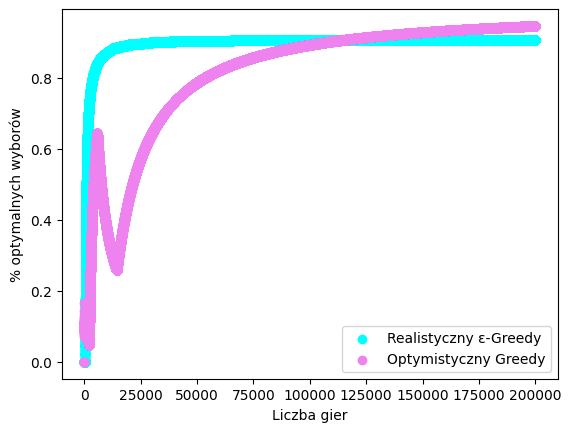

In [4]:
eps = .1
optimal_percentage = []

Q_eps = [0 for _ in range(10)]
N_eps = [0 for _ in range(10)]

Q = [5 for _ in range(10)]
N = [0 for _ in range(10)]

T = 200000
for games_amt in range(1, T):
    if random.random() < eps:
        a = random.randint(0, 9)
    else:
        a = random.choice([i for i, x in enumerate(Q_eps) if x == max(Q_eps)])
    r = bandit(a)
    N_eps[a] += 1
    Q_eps[a] += (r - Q_eps[a]) / N_eps[a]

    a = random.choice([i for i, x in enumerate(Q) if x == max(Q)])
    r = bandit(a)
    N[a] += 1
    Q[a] += .1 * (r - Q[a])
    
    optimal_percentage.append((N_eps[0]/games_amt, N[0]/games_amt))

plt.scatter(range(1, T), [x[0] for x in optimal_percentage], label='Realistyczny ε-Greedy', c='cyan')
plt.scatter(range(1, T), [x[1] for x in optimal_percentage], label='Optymistyczny Greedy', c='violet')
plt.xlabel('Liczba gier')
plt.ylabel('% optymalnych wyborów')
plt.legend()
plt.show()
